<a href="https://colab.research.google.com/github/MarMastro/pet-data-ai-consulting/blob/master/pet_finder_adoption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/content/train.csv")
display(df.sample(10))

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
3154,1,Bacon,60,205,0,2,1,7,0,2,...,1,1,0,41326,1d3441a8f19d8fc42969688b4d2be2f6,0,"Found as a stray, vaccination status unknown, ...",d4bb8cf0a,4.0,2
8500,1,Jia Jia,2,307,0,2,2,0,0,2,...,1,1,0,41401,3937a695ba7235b85e725d270455f0c8,0,Please give me a home,7efb36b65,7.0,3
13236,1,Maja,1,307,0,1,1,7,0,2,...,1,1,10,41332,c992c6f97bb6cfb719fa9ccb3ef6e53b,0,Maja is a quiet and well behave boy. He is not...,f743a63aa,5.0,4
1030,1,Teddy,2,307,0,1,1,2,0,2,...,1,1,0,41326,d764c4fd47f73438f82f2e7f11c8624e,0,Teddy is very cute and sweet. He loves human a...,c712cfd20,2.0,1
7617,2,Leia The Kitten,3,265,266,2,1,3,7,2,...,1,1,0,41326,5aca30a29e8290093fee2a334d65d835,0,Leia was rescued at Downtown Condo. She is cur...,84222fa53,2.0,2
44,1,Xiao Gou,12,307,0,1,2,7,0,2,...,1,1,0,41336,61c1f7b917b7f6772c5e77849c2b4127,0,"xiao gou already rescue one year dy,but still ...",aece6e7bf,2.0,4
9925,2,City Kitten,2,266,0,2,1,2,3,2,...,1,1,0,41401,90569c3f7cb0af35cba5dac82c0ac9d7,0,City Kitten : 1. De-flead 2. Bathed 3. De-worm...,356a9cf88,1.0,3
4668,1,Little Blackie,2,307,307,2,1,0,0,2,...,1,1,0,41326,ea3c0f25eb25d12c130a0c048eb08dac,0,Free for adoption,9d1b799e7,6.0,4
2802,1,Klang Pups,1,307,0,3,2,5,7,2,...,1,4,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,4 puppies need urgent homes. These are 4 puppi...,e6b64b212,4.0,3
3743,2,Darsh,6,266,0,1,7,0,0,1,...,1,1,0,41326,2414605b6b420e9e34d3320b38412895,0,Darsh was found in my university campus in Mel...,4059df1bf,3.0,4


## 1. Inspección rápida

In [3]:
# Tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [4]:
# Estadísticas básicas de variables numéricas
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [5]:
# Corregir max en la columna Age por mostrar 255 como edad

# Cuenta cuántos tienen Age = 255
num_255 = (df['Age'] == 255).sum()
print(f"Registros con Age=255: {num_255}")

Registros con Age=255: 2


In [6]:
import numpy as np

# Paso A: convierte 255 en NaN
df.loc[df['Age'] == 255, 'Age'] = np.nan

# Paso B: imputación (por ejemplo, con la mediana)
mediana_age = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_age)

print("Valores faltantes en Age tras imputar:", df['Age'].isna().sum())

Valores faltantes en Age tras imputar: 0


In [7]:
# Recortar valores en la columna Age que sean mayores a 25 años

# Recorte de Age a un máximo de 25 años
df['Age'] = df['Age'].apply(lambda x: min(x, 25))


In [8]:
# Verificación
print("Edad máxima tras recorte:", df['Age'].max())

Edad máxima tras recorte: 25.0


## 2. Detección de valores faltantes

In [9]:
# 1. Rellenar los nombres faltantes
df['Name'] = df['Name'].fillna('NoName')

In [10]:
df['has_name'] = df['Name'] != 'NoName'

In [11]:
print(df['Name'].isna().sum())
print(df['has_name'].value_counts(normalize=True))

0
has_name
True     0.915627
False    0.084373
Name: proportion, dtype: float64


In [12]:
# Cuenta de nulos por columna
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

Description    13
dtype: int64


## 3. Distribuciones clave

### Edad de la mascota

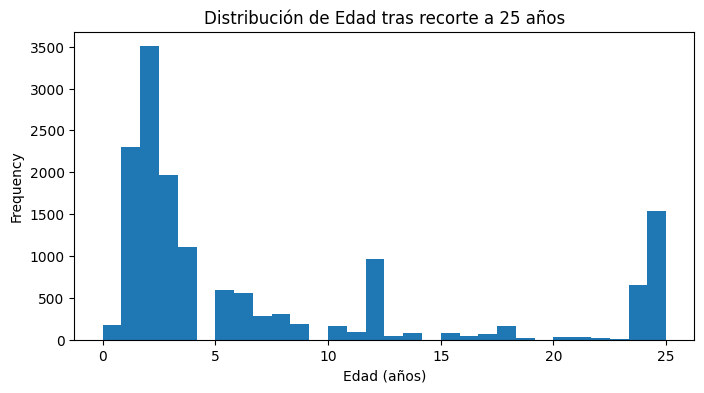

In [13]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Age'].plot(kind='hist', bins=30)
plt.title("Distribución de Edad tras recorte a 25 años")
plt.xlabel("Edad (años)")
plt.show()

### Velocidad de adopción

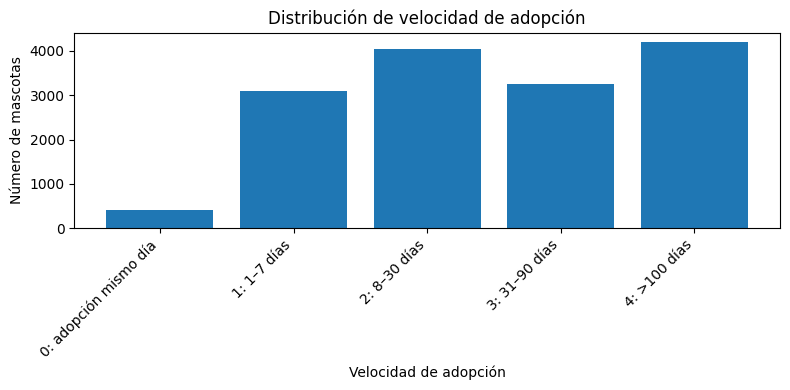

In [14]:
import matplotlib.pyplot as plt

# Cuenta y ordena las clases
counts = df['AdoptionSpeed'].value_counts().sort_index()

# Mapea cada código a su descripción
labels = [
    "0: adopción mismo día",
    "1: 1–7 días",
    "2: 8–30 días",
    "3: 31–90 días",
    "4: >100 días"
]

plt.figure(figsize=(8,4))
plt.bar(counts.index, counts.values)

# Ajusta etiquetas del eje X
plt.xticks(counts.index, labels, rotation=45, ha='right')

# Etiquetas de los ejes
plt.xlabel("Velocidad de adopción")
plt.ylabel("Número de mascotas")

plt.title("Distribución de velocidad de adopción")
plt.tight_layout()
plt.show()

### Número de fotos

<Axes: >

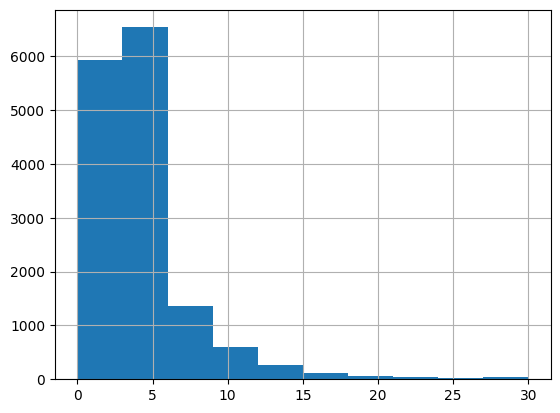

In [15]:
df['PhotoAmt'].hist()

## 4. Cruces básicos

### Adopción vs Edad

/tmp/ipython-input-16-2689853760.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


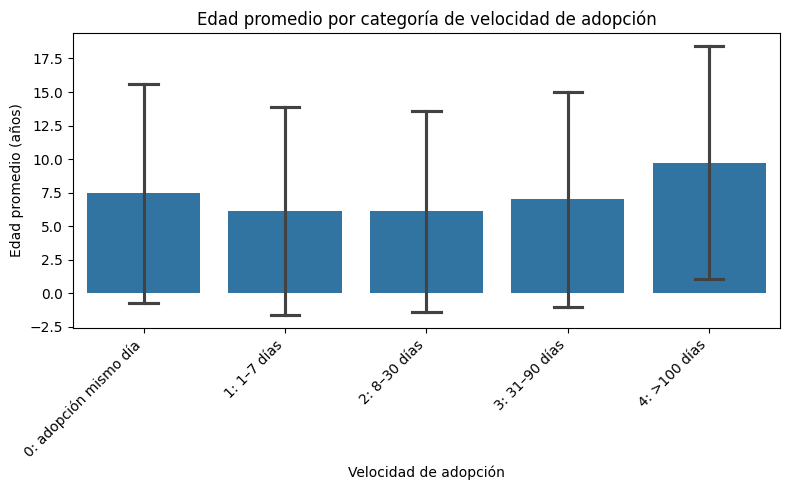

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepara las etiquetas
labels = [
    "0: adopción mismo día",
    "1: 1–7 días",
    "2: 8–30 días",
    "3: 31–90 días",
    "4: >100 días"
]

plt.figure(figsize=(8,5))
sns.barplot(
    x='AdoptionSpeed',
    y='Age',
    data=df,
    estimator=np.mean,    # calcula la media de Age
    ci='sd',              # muestra ±1 desviación estándar
    capsize=.2            # ancho de las líneas de error
)

# Ajustes de ejes
plt.xticks(ticks=[0,1,2,3,4], labels=labels, rotation=45, ha='right')
plt.xlabel("Velocidad de adopción")
plt.ylabel("Edad promedio (años)")
plt.title("Edad promedio por categoría de velocidad de adopción")
plt.tight_layout()
plt.show()


### Adopción según presencia de descripción

In [17]:
df['has_description'] = df['Description'].notna()
df.groupby('has_description')['AdoptionSpeed'].value_counts(normalize=True).unstack()

AdoptionSpeed,0,1,2,3,4
has_description,,,,,
False,NaN,0.153846,0.384615,0.076923,0.384615
True,0.02737,0.206142,0.269159,0.217490,0.279840


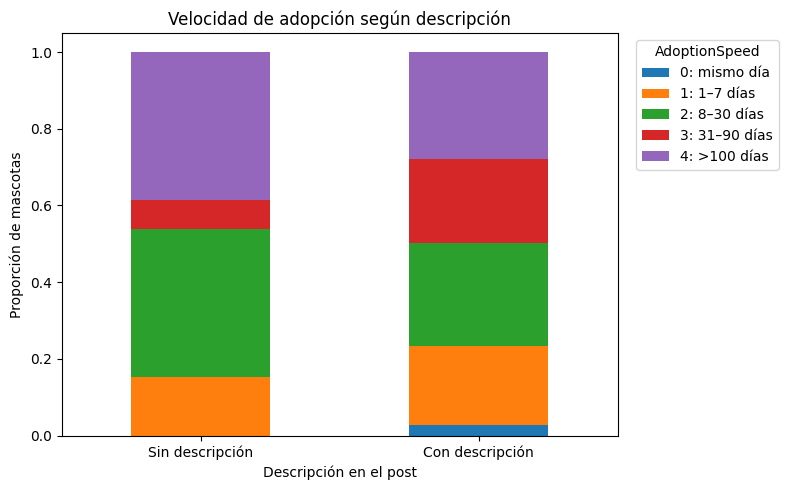

In [18]:
import matplotlib.pyplot as plt

# 1. Calcula las proporciones normalizadas
prop = df.groupby('has_description')['AdoptionSpeed'] \
         .value_counts(normalize=True) \
         .unstack()

# 2. Dibuja el bar plot apilado
ax = prop.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

# 3. Ajusta etiquetas
ax.set_xticklabels(['Sin descripción', 'Con descripción'], rotation=0)
ax.set_xlabel('Descripción en el post')
ax.set_ylabel('Proporción de mascotas')
ax.set_title('Velocidad de adopción según descripción')

# 4. Leyenda con significado de cada código
ax.legend(
    title='AdoptionSpeed',
    labels=[
        '0: mismo día',
        '1: 1–7 días',
        '2: 8–30 días',
        '3: 31–90 días',
        '4: >100 días'
    ],
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


## Baseline

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Selección de features
features = [
    'Age', 'Type', 'Gender', 'Quantity', 'Fee',
    'PhotoAmt', 'has_description', 'Vaccinated',
    'Sterilized', 'Health'
]

# 2. One‑hot encoding de categóricas
X = pd.get_dummies(df[features], drop_first=True)

# 3. Target
y = df['AdoptionSpeed']

# 4. División train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5. Entrenamiento del modelo
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# 6. Predicción y métricas
y_pred = model.predict(X_val)
print("=== Classification Report ===")
print(classification_report(y_val, y_pred, digits=3))

print("=== Matriz de Confusión ===")
cm = confusion_matrix(y_val, y_pred)
print(cm)

# 7. Importancia de features
importances = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("\n=== Top 10 Features ===")
print(importances.head(10))


=== Classification Report ===
              precision    recall  f1-score   support

           0      0.048     0.146     0.072        82
           1      0.273     0.299     0.285       618
           2      0.319     0.264     0.289       807
           3      0.312     0.288     0.300       652
           4      0.449     0.426     0.437       840

    accuracy                          0.319      2999
   macro avg      0.280     0.285     0.277      2999
weighted avg      0.337     0.319     0.326      2999

=== Matriz de Confusión ===
[[ 12  22  12  14  22]
 [ 57 185 149 116 111]
 [ 71 204 213 155 164]
 [ 43 132 146 188 143]
 [ 69 135 148 130 358]]

=== Top 10 Features ===
PhotoAmt           0.295897
Age                0.254202
Fee                0.118682
Quantity           0.088144
Gender             0.070177
Vaccinated         0.065577
Sterilized         0.049114
Type               0.032877
Health             0.024365
has_description    0.000965
dtype: float64


El baseline da una accuracy de 31,9 % y un macro‑F1 de 27,7 %, con estos puntos clave:

Clases débiles

Clase 0 (adopción mismo día): f1 = 0,079

Clase 1 (1–7 días): f1 = 0,284
→ El modelo casi no predice bien las adopciones rápidas.

Matriz de confusión

Muchas “0” se confunden con 1 y 2.

La clase 4 (>100 días) es la mejor predicha (f1 = 0,438) porque es la mayoritaria.

Features más importantes

PhotoAmt (29 %) y Age (25 %) dominan la predicción.

has_description casi no aporta (0,1 %).

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Aplica SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:", y_train.value_counts().to_dict())
print("Después SMOTE:", y_res.value_counts().to_dict())

# 2. Reentrena el RandomForest sobre los datos balanceados
model_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model_smote.fit(X_res, y_res)

# 3. Evalúa en el conjunto de validación
y_pred_smote = model_smote.predict(X_val)
print("\n=== Classification Report tras SMOTE ===")
print(classification_report(y_val, y_pred_smote, digits=3))

print("=== Matriz de Confusión tras SMOTE ===")
print(confusion_matrix(y_val, y_pred_smote))

# 4. Importancias de features
import pandas as pd
importances_smote = pd.Series(
    model_smote.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)
print("\n=== Top 10 Features tras SMOTE ===")
print(importances_smote.head(10))


Antes SMOTE: {4: 3357, 2: 3230, 3: 2607, 1: 2472, 0: 328}
Después SMOTE: {2: 3357, 3: 3357, 4: 3357, 1: 3357, 0: 3357}

=== Classification Report tras SMOTE ===
              precision    recall  f1-score   support

           0      0.049     0.134     0.072        82
           1      0.276     0.293     0.284       618
           2      0.317     0.280     0.297       807
           3      0.307     0.282     0.294       652
           4      0.438     0.420     0.429       840

    accuracy                          0.318      2999
   macro avg      0.277     0.282     0.275      2999
weighted avg      0.333     0.318     0.325      2999

=== Matriz de Confusión tras SMOTE ===
[[ 11  20  15  13  23]
 [ 54 181 161 111 111]
 [ 53 189 226 158 181]
 [ 40 132 158 184 138]
 [ 65 134 154 134 353]]

=== Top 10 Features tras SMOTE ===
PhotoAmt           0.331369
Age                0.280371
Fee                0.111667
Quantity           0.071775
Vaccinated         0.056506
Sterilized         

El SMOTE sólo dio una mejora marginal y la clase 0 (adopción en el mismo día) sigue con un f1 ≈ 0.08. Para darle más potencia al modelo, es momento de incorporar la descripción del anuncio como feature de texto.

### Añadir TF‑IDF sobre Description

In [21]:
# Rellenar los NAN

df['Description'] = df['Description'].fillna('')

In [22]:
# Vectorizar texto

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=200, stop_words='english')
X_txt = tfidf.fit_transform(df['Description'])
print("Dimensión TF‑IDF:", X_txt.shape)

Dimensión TF‑IDF: (14993, 200)


In [23]:
from scipy import sparse

# 1. Asegurar que X solo contiene floats o ints
X_numeric = X.astype(float)

# 2. Transfórmarlo en matriz dispersa
X_sparse = sparse.csr_matrix(X_numeric.values)

# 3. Apilar con X_txt
X_comb = sparse.hstack([X_sparse, X_txt], format='csr')

# Comprobar la forma resultante
print("Shape de X_comb:", X_comb.shape)

Shape de X_comb: (14993, 210)


In [24]:
X_train2, X_val2, y_train, y_val = train_test_split(
    X_comb, df['AdoptionSpeed'],
    stratify=df['AdoptionSpeed'],
    test_size=0.2,
    random_state=42
)

In [25]:
from scipy.sparse import csr_matrix, hstack
import numpy as np

# 1. Recalcula X asegurándo de que todas las columnas sean numéricas
X_dummies = pd.get_dummies(df[features], drop_first=True)

# 2. Convierte a float64 (o a un tipo numérico soportado)
X_numeric = X_dummies.astype(np.float64)

# 3. Transforma en matriz dispersa CSR
X_sparse = csr_matrix(X_numeric.values)

# 4. Apila con la matriz TF‑IDF (que ya es float64)
X_comb = hstack([X_sparse, X_txt], dtype=np.float64, format='csr')

print("Shape de X_sparse:", X_sparse.shape)
print("Shape de X_txt   :", X_txt.shape)
print("Shape de X_comb  :", X_comb.shape)

Shape de X_sparse: (14993, 10)
Shape de X_txt   : (14993, 200)
Shape de X_comb  : (14993, 210)


In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split de train/validación sobre X_comb y el target real
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_comb,
    df['AdoptionSpeed'],
    test_size=0.2,
    stratify=df['AdoptionSpeed'],
    random_state=42
)

# 2. Aplica SMOTE en train
smote = SMOTE(random_state=42)
X_res2, y_res2 = smote.fit_resample(X_train2, y_train2)

print("Distribución tras SMOTE train:", y_res2.value_counts().to_dict())

# 3. Entrena RandomForest
model2 = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model2.fit(X_res2, y_res2)

# 4. Predicción y métricas
y_pred2 = model2.predict(X_val2)
print("=== Classification Report (TF-IDF + SMOTE) ===")
print(classification_report(y_val2, y_pred2, digits=3))

print("=== Matriz de Confusión ===")
print(confusion_matrix(y_val2, y_pred2))

Distribución tras SMOTE train: {2: 3357, 3: 3357, 4: 3357, 1: 3357, 0: 3357}
=== Classification Report (TF-IDF + SMOTE) ===
              precision    recall  f1-score   support

           0      0.364     0.195     0.254        82
           1      0.331     0.340     0.335       618
           2      0.381     0.346     0.363       807
           3      0.382     0.304     0.338       652
           4      0.483     0.615     0.541       840

    accuracy                          0.407      2999
   macro avg      0.388     0.360     0.366      2999
weighted avg      0.399     0.407     0.399      2999

=== Matriz de Confusión ===
[[ 16  18  13  10  25]
 [  9 210 156  86 157]
 [  6 184 279 135 203]
 [  6 115 165 198 168]
 [  7 108 119  89 517]]


Integrar TF‑IDF + SMOTE elevó el accuracy de 31,9 % a 41,2 % y el macro‑F1 de 27,7 % a 37,7 %. La clase 0 subió de f1 ≈ 0,08 a 0,29 y la clase 4 de 0,41 a 0,54

In [27]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# 1. Parámeter grid
param_dist_small = {
    'n_estimators': [50, 100],          # solo dos valores
    'max_depth': [10, 20],              # acotado
    'min_samples_split': [2, 5],        # dos opciones
    'min_samples_leaf': [1, 2],         # dos opciones
    'max_features': ['sqrt', 0.5]       # dos opciones
}

# 2. Modelo base
rf_small = RandomForestClassifier(random_state=42)

# 3. CV
cv_small = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 4. RandomizedSearchCV
search_small = RandomizedSearchCV(
    estimator=rf_small,
    param_distributions=param_dist_small,
    n_iter=5,
    scoring='f1_macro',
    cv=cv_small,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 5. Entrenamiento
search_small.fit(X_res2, y_res2)

# 6. Resultados rápidos
print("Mejores parámetros:\n", search_small.best_params_)
best_rf_small = search_small.best_estimator_

# 7. Evaluación
y_pred_small = best_rf_small.predict(X_val2)
from sklearn.metrics import classification_report, confusion_matrix
print("\n=== Reporte RF acelerado ===")
print(classification_report(y_val2, y_pred_small, digits=3))
print("\n=== Matriz de Confusión ===")
print(confusion_matrix(y_val2, y_pred_small))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores parámetros:
 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

=== Reporte RF acelerado ===
              precision    recall  f1-score   support

           0      0.247     0.220     0.232        82
           1      0.339     0.343     0.341       618
           2      0.375     0.322     0.346       807
           3      0.435     0.279     0.340       652
           4      0.461     0.652     0.540       840

    accuracy                          0.407      2999
   macro avg      0.371     0.363     0.360      2999
weighted avg      0.401     0.407     0.395      2999


=== Matriz de Confusión ===
[[ 18  24  10   6  24]
 [ 21 212 141  60 184]
 [ 11 184 260 113 239]
 [  6 112 158 182 194]
 [ 17  93 125  57 548]]


Los resultados del RF optimizado te dan un accuracy de 40,7 % y un macro‑F1 de 36,0 %. Así comparan:

Baseline (solo tabulares + class_weight)

Accuracy 31,9 %, macro‑F1 27,7 %

+ TF‑IDF (texto) + SMOTE

Accuracy 41,2 %, macro‑F1 37,7 %

RF optimizado (SMOTE + RandomizedSearchCV)

Accuracy 40,7 %, macro‑F1 36,0 %

Vemos que el tuning de hiperparámetros en RandomForest no mejoró sobre el modelo con texto y SMOTE; incluso bajó un poco el macro‑F1. En detalle:

Clase 0 (adopción mismo día) cayó de f1 0,29 a 0,23.

Clase 4 (adopción lenta) se mantiene fuerte en ~0,54.